# Binomial Distribution

binom.pmf() Probability Mass Function

binome.cdf() Cumulative Distribution Function, adds together probabilities

## Problem statement 
80% of all the visitors to Lavista Museum end up buying souvenirs from the souvenir shop at the Museum. On the coming Sunday, if a random sample of 10 visitors is picked:

 1. Find the probability that every visitor will end up buying from the souvenir shop
 2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop

Let's check first whether we satisfy the assumptions of the binomial distribution.
*  There are only two possible outcomes (success or failure) for each trial – A visitor will buy souvenirs from the souvenir shop or not (yes or no).
* Number of trials (n) is fixed - There are 10 visitors in the sample.
* Each trial is independent of the other trials - It is reasonable to assume that the buying activity of visitors is independent.
* The probability of success (p) is the same for each trial - The probability of success for each visitor is 0.8.

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

**Let's estimate the probability distribution of visitors**

In [2]:
# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

In [3]:
# delcare p which represents the probability of success, i.e., the customer buys
p = 0.80

In [4]:
# delcare different possibl enumber of visitors selected in a numpy array
# in other words a vector of all possiblities, from nobody buys to everybody buys
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

The probability function of Binomial Distribution provides the probability for  x  number of successes from n trials where  p is the probability of success   

>$P(X=x)= {n\choose x}p^x(1-p)^{n-x}$


Here, we know that:

* n ( number of visitors selected randomly ) = 10
* p ( probability of success i.e., the probability that a visitor will end up buying a souvenir) = 0.80
* q ( probability of failure i.e., the probability that a visitor will not end up buying a souvenir) = 1 - 0.80 = 0.20
* x ( number of successes ) = 10


We will use binom.pmf() to calculate this probability function which provides the probability for the number of visitors (out of n=10) that will end up buying souvenirs from the souvenir shop.

In [5]:
# import the required function, binom is a method within scipy.stats 
from scipy.stats import binom

# use the binom.pmf() function to generate probability distribution
# pmf Probability Mass Function P(X=x) = (n x)p**x(1-p)**n-x
binomial = binom.pmf(k=k, n=n, p=p)
# k is the vector 0 to 10, n is 10, p is 0.80 as defined above

In [6]:
# list of the probabilites of each option in the array, (0 people buy, 1 person buys, 2 people buy, etc)
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

Text(0, 0.5, 'Probability of success')

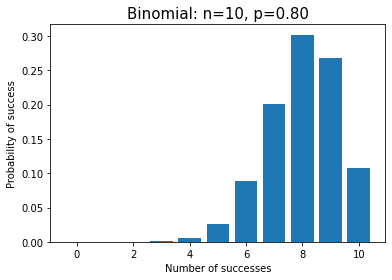

In [7]:
# plot the distribution of the Probability Mass Function
plt.bar(k, binomial);
plt.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of success')

The last element of this binomial array represents the probability that 10 out of 10 people will buy.  we can pull this element out as binomial[10]


In [8]:
binomial[10]

0.10737418240000006

In [9]:
# another way to determine without creating arange 1 thru 10 and calculating each pmf. 
binom.pmf(k=10, n=10, p=0.8)

0.10737418240000006

10.7% or about 11% chance that of 10 randomly selected people, all 10 will have bought

**add probabilities to see percent that 7 or less will buy**

CDF Cumulative Distribution Function

Add the probabilities

The above probability shows that the probability of exactly 10 successes is  ~ 0.11.

Now, we are interested in knowing the probability of at most 7 successes which means what is the probability that out of 10 randomly selected visitors, a maximum of 7 visitors will buy souvenirs from the souvenir shop.

Here, we need to calculate the probability for P(X<=7). CDF is used to calculate the cumulative probability.



**CDF:** of a Random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$

In our case, Random Variable (X) is the number of visitors who will buy souvenirs from the souvenir shop.

$P(X\leq 7)$

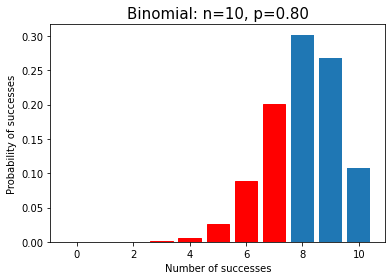

In [10]:
# can color 7 and below on the bar chart
bar1= plt.bar(k, binomial)

plt.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes')
for i in range (0,8):
  bar1[i].set_color('r')
plt.show()

In the above graph, red region represents P(X<=7). Let's calculate the probability that out of 10 randomly selected visitors, a maximum of 7 will buy from the shop.  We will use binom.cdf() for this.

In [11]:
# calculate cdf (Cumulative Distribution Function)
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

In [12]:
# 1 minus the binom.cdf() will tell us the remainder, another way of framing the question
# i.e. what is the chance at least 4 visitors will buy?
1-binom.cdf(k=3, n=n, p=p) #finds 3 and below, then subtracts from 1 ( 100%) to give the remainder for >=4

0.9991356416

There is a 99.9 percent chance that 4 or more people will buy

## Conclusion:

There is a 10.74% chance that every visitor will buy and a 32.2% chance 7 or fewer people will buy.

1 minus 32% equals a 68% chance 8 or more will buy.

Let's try the calculation with different probabilites, instead of an 80% chance of buying, (8/10 people), we'll compare 70%, 80%, and 90%

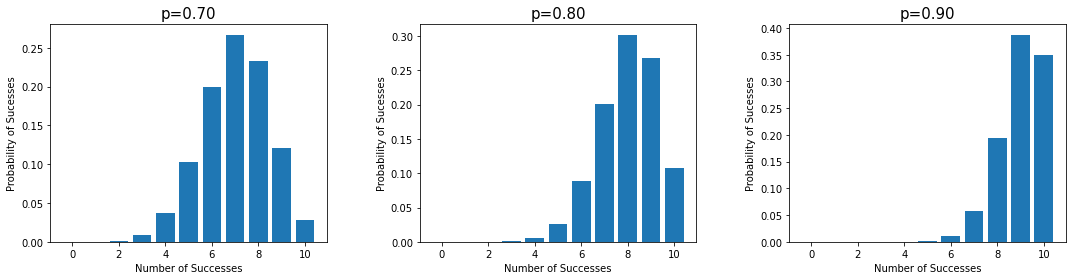

In [13]:
plt.figure(figsize=(15,4))

#70% chance (7 out of 10 will buy)
plt.subplot(131)
binomial_70 = binom.pmf(k, n, p=0.7)

#plot the distribution
plt.bar(k, binomial_70)
plt.title('p=%.2f' % (0.7), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel('Probability of Sucesses')

#80% chance (8 out of 10 will buy)
plt.subplot(132)
binomial_80 = binom.pmf(k, n, p=0.8)

#plot the distribution
plt.bar(k, binomial_80)
plt.title('p=%.2f' % (0.8), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel('Probability of Sucesses')

#90% chance (9 out of 10 will buy)
plt.subplot(133)
binomial_90 = binom.pmf(k, n, p=0.9)

#plot the distribution
plt.bar(k, binomial_90)
plt.title('p=%.2f' % (0.9), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel('Probability of Sucesses')

plt.tight_layout(w_pad=5)

# Normal Distribution

norm.pdf Probability Density Function

norm.cdf Cumulative Distribution Function

norm.ppf Percentile Function

## Problem statement

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.


 
1. Calculate the probability that a student will score less than 800 in SAT exam
2. Calculate the probability that a student will score more than 1300 in SAT exam
3. Calculate the minimum marks a student must score in order to secure 90th percentile
4. Calculate the minimum marks a student must score in order to be in the top 5%

In [14]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [15]:
sat_score = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Business Statistics Course/Week 1 /sat_score.csv')
sat_score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [16]:
# import the required function
from scipy.stats import norm

In [17]:
# estimate the mean and standard deviation of the SAT scores data (the sample)
mu = sat_score['score'].mean()
sigma = sat_score['score'].std() 
print('The estimated mean is', round(mu, 2))
print('The estimated standard deviation is', round(sigma,2))
# we labeled the variables mu and sigma, even though they come from the sample and thus
# are S and xbar.  We will be using S and xbar to estimate mu and sigma for the population

The estimated mean is 1007.46
The estimated standard deviation is 204.43


##Plotting the distribution
It will help us analyze the shape of the data and visualize the PDF(probability density function) of normal distribution usint the parameters (mean(mu) and standard deviation(sigma)) from the data

Text(0.5, 1.0, 'Normal Distribution')

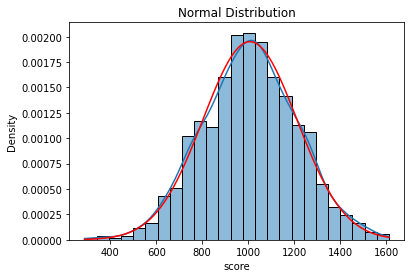

In [18]:
# calculate the pdf of SAT scores usin norm.pdf()
density = pd.DataFrame()
density['x'] = np.linspace(
    sat_score['score'].min() - 0.01, sat_score['score'].max() + 0.01, 100
)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

fig, ax = plt.subplots()
# plot the distribution of the data using histogram
sns.histplot(sat_score['score'], ax=ax, kde=True, stat='density')
# plot the pdf of the normal distribution
ax.plot(density['x'], density['pdf'], color='red')
plt.title('Normal Distribution')

In [19]:
density.head()

,x,pdf
0,287.990000,0.000004
1,301.363939,0.000005
2,314.737879,0.000006
3,328.111818,0.000008
4,341.485758,0.000010


**Insight:**  As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

>$X \sim N(\mu, \sigma^2)$

In other words, 

the Blue line is the actual sample distribution

The red line is the mathmatical Normal Distribution for the same mean and Standard Deviation. What normality should look like.


We can see they are very close to each other and thus determine that our Sample data is very close to normally distributed

we can assume Normal Distribution

### Calculate the probability that a student will score less than 800 on the SAT

area to the left of 800 on the plot

In [20]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob_less_than_800 = norm.cdf(800, mu, sigma)
print(
    'The probability that a student will score less than 800 is',
    round(prob_less_than_800, 4), 
)
# 4 with round() means 4 decimal places
print('Or, a ', round(prob_less_than_800, 3) * 100, '% chance a student will score less than 800.', sep='')

The probability that a student will score less than 800 is 0.1551
Or, a 15.5% chance a student will score less than 800.


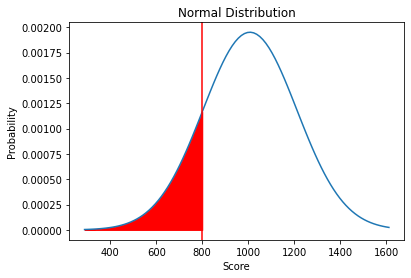

In [21]:
# plot the probability distribution
# we are plotting the distributions here to better visualize the calculation.
# of course you do not 'need' to create the following visualization to answer the question.
# you can directly use teh cdf function for probability calculations, but we'll take a look, anyway
plt.plot(density['x'], density['pdf']);
plt.axvline(x=800, c='r')
x1= np.linspace(density['x'].min(), 800, 50) #50 is the default number of returns on linspace, so don't need to specify unless you want other than 50
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

In [22]:
# linspace calculates evenly spaced intervals between start and stop(stop included), and returns the requested number of intervals
np.linspace(density['x'].min(), 800, 15) #defaults to 50 returns, 

array([287.99      , 324.56214286, 361.13428571, 397.70642857,
       434.27857143, 470.85071429, 507.42285714, 543.995     ,
       580.56714286, 617.13928571, 653.71142857, 690.28357143,
       726.85571429, 763.42785714, 800.        ])

### Calculate the probability that a student will score more than 1300

what's to the Right of 1300, 

Must use 1 minus the cdf for greater than, or to the right in the plot

(The full area equals 1 so the area to the right of x is 1 minus x)

In [23]:
# find teh cumulative probability and subtract it from 1
prob_greater_than_1300 =  1- norm.cdf(1300, mu, sigma)
print(
    'The probability that a student will score more than 1300 is',
    round(prob_greater_than_1300, 4)
)
print('Or, a ', round(prob_greater_than_1300, 3) *100, '% chance', sep='')

The probability that a student will score more than 1300 is 0.0762
Or, a 7.6% chance


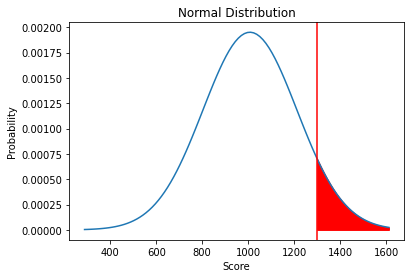

In [24]:
# plot the probability distribution
# We are plotting to visualize the distribution
# not strictly required to answer the question, but helpful
plt.plot(density['x'], density['pdf'])
plt.axvline(x=1300, c='r')
x1 = np.linspace(1300, density['x'].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

In [25]:
norm.cdf(1000, 2000, 100)

7.61985302416047e-24

### Reverse Probability Calculation
Calculate the minimum marks a student must make to be in teh 90th percentile

In [26]:
# calculate the 90th percentile score using ppf() function
# norm.ppf() calculated percentile point
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print('The 90th percentile score should be', round(score_90th_percentile))
# to the left is a probability on 0.90, to the right is a probability of 0.10
# this is simply using the calculator and the mu and sigma, mean and s.d.  Not counting the actual scores because the dist is normal

The 90th percentile score should be 1269


This norm.ppf() calculation is using only mean and standard dev from the data

it is NOT using the actual data points.   

below I've compared the inferred percentiles with the actual observed percentiles using df.describe(). 

They are close which further proves this data set is nearly normal distribution.

Again, the inferred results are based on mean and std dev of the sample to infer the mu and sigma for the population

In [65]:
sat_score.describe()

,student_id,score
count,1000.000000,1000.000000
mean,500.500000,1007.460000
std,288.819436,204.426007
min,1.000000,288.000000
25%,250.750000,873.000000
50%,500.500000,1010.000000
75%,750.250000,1148.000000
max,1000.000000,1612.000000


In [64]:
norm.ppf(0.75, mu, sigma)

1145.3432464848038

In [66]:
norm.ppf(0.50, mu, sigma)

1007.46

In [71]:
norm.ppf(0.25, mu, sigma)

869.5767535151963

In [69]:
sat_score['score'].median()

1010.0

In [70]:
sat_score['score'].std()

204.4260071331248

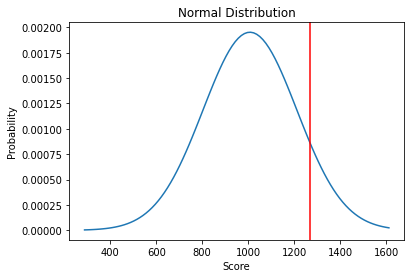

In [27]:
plt.plot(density['x'], density['pdf'])
plt.axvline(x=score_90th_percentile, c='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

**Conclusion:** 

1) Only 15.51% of students will score below 800 and 7.62% of students will score above 1300. It shows that the 2020 SAT exam's complexity is moderate. 

2) Students should score at least 1269 to secure the 90th percentile.

3) Students should score at least 1344 to be in the top 5%.

## Z-score. standardization of Normal Variables
subtract the mean and divide by the standard deviation to rescale from 0 to 1

Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5. 

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30. 

Help the college to choose the best candidate for the fellowship!

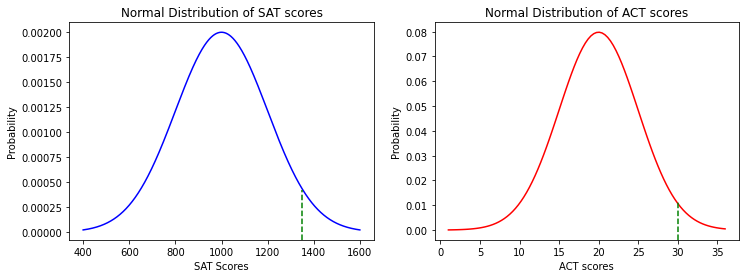

In [28]:
# don't need to do this, just calculate and plot below on standardezed scale
# for starters we can plot the two distributions and visualize them
# Plot the two distributions
# we are plotting to better visualize the calculations
# of course you don't 'need' to visualize to answer the question
# you could just use the cdf function for probability calculations
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
x = np.linspace(400, 1600, 1000)
ax1.plot(x, norm.pdf(x, loc = 1000, scale = 200), color = 'b')
ax1.set_title("Normal Distribution of SAT scores")
ax1.set_xlabel('SAT Scores')
ax1.set_ylabel('Probability')
ax1.axvline(1350, ymax = 0.23, linestyle = '--', color = 'green') #ymax sets height of axvline here
x1 = np.linspace(1,36, 100)
ax2. plot(x1, norm.pdf(x1, loc = 20, scale = 5), color = 'r')
ax2.set_title('Normal Distribution of ACT scores')
ax2. set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'green')

In the above plot, the blue curve represents the distribution of SAT scores and the red curve represents the distribution of ACT scores. The highest scores of the applicants in SAT and ACT exams are dotted with green lines in the respective distributions. However, it is difficult for us to compare the raw highest scores in the above plot. Thus, we need to standardize the two scores and compare their Z-scores.

Z-score is number of standard deviations from the mean

score minus mean divided by standard deviation

1350 - 1000 / 200

In [29]:
# find the Z-score for the higest SAT score
top_sat = (1350 - 1000)/200
print('The Z-score of the highest SAT scorer among all applicants is', top_sat)

# find the Z-score for the highest ACT score
top_act = (30 - 20)/5
print('The Z-score for the highest ACT scorer among all applicants is', top_act)

The Z-score of the highest SAT scorer among all applicants is 1.75
The Z-score for the highest ACT scorer among all applicants is 2.0


Compared to their respective test averages, the ACT candidate has the higher score, 2 standard deviations above the mean vs the SAT candidate with 1.75 standard deviations above the mean

let's plot the standard normal distribution and visualize the standardized scores

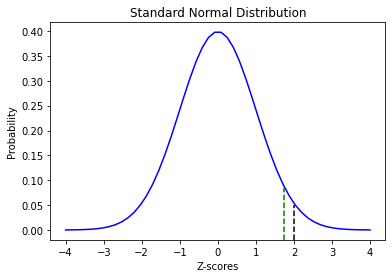

In [72]:
# plot the normal distribution
# and visualize the standardized scores

fig, ax = plt.subplots()
x=np.linspace(-4, 4, 50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b') #loc= and scale= are mu and sigma
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_sat, ymax = 0.24, linestyle = '--', color = 'green')
ax.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')

### Quiz scratch
What is the probaility that a student will score more than 750 on the SAT


In [31]:
prob_perc_70th = 1-norm.cdf(750, mu, sigma)
print('The probability that a student will score more than 750 is: ', round(prob_perc_70th, 4)*100, '%.', sep='')


The probability that a student will score more than 750 is: 89.61%.


Calculate the minimu score to secure 95th percentile

In [32]:
perc95th = norm.ppf(0.95, mu, sigma)
perc95th

1343.7108592761278

Calculate the score required to be in the top 10%

In [33]:
perc90th = norm.ppf(0.9, mu, sigma)
perc90th

1269.4424694794877

In [34]:
# Z-score (score - mean)/standard deviation
phys = (60-47.5)/12.3
print(phys)

hist = (85-77)/7.1
print(hist)

cs = (40-33)/7.3
print(cs)


1.0162601626016259
1.1267605633802817
0.9589041095890412


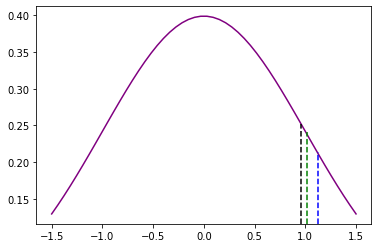

In [35]:
# could plot them just to visualize
fig, ax = plt.subplots()
x = np.linspace(-1.5, 1.5, 50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'purple');
ax.axvline(phys, ymax = .42, linestyle = '--', color = 'green')
ax.axvline(hist, ymax = .33, linestyle = '--', color = 'blue')
ax.axvline(cs, ymax = 0.46, linestyle = '--', color = 'black')

# fig, ax = plt.subplots()
# x=np.linspace(-4, 4, 50)
# ax.plot(x, norm.pdf(x,loc = 0, scale = 1), color = 'b')
# ax.set_title('Standard Normal Distribution')
# ax.set_xlabel('Z-scores')
# ax.set_ylabel('Probability')
# ax.axvline(top_sat, ymax = 0.24, linestyle = '--', color = 'green')
# ax.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')

Salaries of employees in a company are normally distributed with a mean of 55000 with a standard deviation of 6200. What percentage of employees earn approximately between 59000 and 67000

In [36]:
# find the probability of above 59k and subtract the probability above 67k
# alternatively, find below 67k and subtract below 59k
# same scale so no need to find Z-score, but you could. (59000-55000)/6200 = 0.645 and (67000*55000)/6200 = 1.9354
# then calculate as below
mean = 55000
sd = 6200
(1 - norm.cdf(59000, mean, sd)) - (1 - norm.cdf(67000, mean, sd))

0.23294586132016037

Alternatives

In [37]:
norm.cdf(1.9534, loc= 0, scale=1) - norm.cdf(0.645, loc=0, scale=1)

0.2340774847353766

In [38]:
(1- norm.cdf(59000, 55000, 6200)) - (1-norm.cdf(67000, 55000, 6200))

0.23294586132016037

In [39]:
stats.norm.cdf(67000,loc=55000,scale=6200) - stats.norm.cdf(59000,loc=55000,scale=6200)

0.23294586132016037

In [40]:
norm.cdf(67000, mean, sd) - norm.cdf(59000, mean, sd)

0.23294586132016037

##play scratch

In [41]:
u = 50
sig = 10
xs = np.linspace(1,100,100)

In [42]:
df=pd.DataFrame({'num':xs, 'pdf': norm.pdf(xs, u, sig)})

df.head()

,num,pdf
0,1.0,2.438961e-07
1,2.0,3.961299e-07
2,3.0,6.369825e-07
3,4.0,1.014085e-06
4,5.0,1.598374e-06


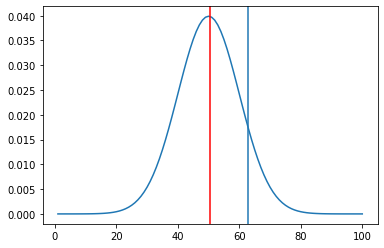

In [43]:
plt.plot(df['num'], df['pdf'])
plt.axvline(df['num'].mean(), c='r')
nintyith_perc = norm.ppf(.9, u, sig)
plt.axvline(nintyith_perc)
